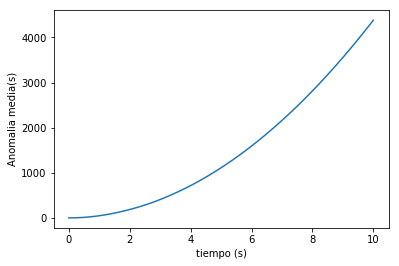

In [2]:
# Importamos librerias necesarias
# SciPy, SciPy,integrate: librerías para solución por Runge-Kutta 4,5 de la ecuación.
# Matplotlib: para graficar función solución (theta(t))
# Numpy: Matemáticas y trabajo matricial.
import scipy, scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
 
# Se define ecuación diferencial como sistema de dos
# ecuaciones de primer orden.
def dydt(t,y):
    theta,thetaPrima = y
    thetaPrimaPrima = (n) /(1 - e* scipy.cos(theta))
    return [thetaPrima,thetaPrimaPrima]
 
# Definimos unas constantes a manera de ejemplo.
# g: aceleración de la gravedad.
# L: longitud del péndulo
# theta0: ángulo desde el que se suelta el péndulo.
# thetaPrima0: velocidad inicial con la que se suelta.
  
n = 3/2
e = 0.093
theta0 = 0 # Ángulo inicial: 90 grados.
thetaPrima0 = 0.0
  
solucionador = scipy.integrate.ode(dydt)
# 'dopri5' es para indicarle al solucionador que resuelva
# la ecuación por el método de Runge-Kutta 4,5
solucionador.set_integrator('dopri5') 
# .set_f_params es la función para pasarle
# los argumentos adicionales a la ecuación diferencial.
# Para nuestro caso, la longitud del péndulo

# Le indicamos al solucionador el valor inicial del problema.
# theta0: ángulo desde el que se suelta el péndulo.
# thetaPrima0: velocidad inicial con la que se suelta.
solucionador.set_initial_value([theta0,thetaPrima0] , 0)
 
thetas = [] # Crear vector vacío de ordenadas.
dt = 0.01 # Pequeño intervalo delta de t.
while solucionador.successful() and solucionador.t < 10:
    solucionador.integrate(solucionador.t+dt)
    thetas.append(solucionador.y[0]*180/scipy.pi) # Llenar el vector de ordenadas con valor de theta
 
# Creamos vector de abscisas de tiempo.
t=[]
for i in range(len(thetas)):
    t.append(i*dt)
 
fig = plt.figure() # Creamos una nuevo gráfico con Matplotlib.
plt.plot(t,thetas) # Graficamos el vector de abscisas vs el vector de ordenadas.
plt.xlabel('tiempo (s)') # Título eje x
plt.ylabel('Anomalia media(s)') # Título eje y
plt.show() # Mostramos el gráfico en pantalla.
